#       Restaurant Food Cost

Name : Radha Kulkarni                                                                                                           
Project batch : DS2401

# Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

# Dataset Attributes

TITLE:  The feature of the restaurant which can help identify what and for whom it is suitable for.                             
RESTAURANT_ID: A unique ID for each restaurant.                                                                                 
CUISINES: The variety of cuisines that the restaurant offers.                                                                   
TIME: The open hours of the restaurant.                                                                                         
CITY: The city in which the restaurant is located.                                                                              
LOCALITY: The locality of the restaurant.                                                                                       
RATING: The average rating of the restaurant by customers.                                                                      
VOTES: The overall votes received by the restaurant.                                                                            
COST: The average cost of a two-person meal.


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#limporting train data

file_path = r'C:\Users\Administrator\Downloads\Data_Train.xlsx'
train = pd.read_excel(file_path)
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
file_path =r'C:\Users\Administrator\Downloads\Data_Test.xlsx'
test = pd.read_excel(file_path)
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [6]:
#checking for shape of train dataset
train.shape

(12690, 9)

Train dataset contains 12690 rows and 9 columns

In [5]:
##checking for shape of test dataset
test.shape

(4231, 8)

test columns contains 4231 rows and 8 columns

In [6]:
##checking for columns of train dataset
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [7]:
##checking for columns of test dataset
test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [8]:
##checking for info of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [9]:
##checking for info of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [10]:
##checking for datatypes of train dataset
train.dtypes


TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [11]:
##checking for datatypes of test dataset
test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

# Checking for null values

In [12]:
#checking for null values of train dataset
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

There are 112 null values in 'city',98 null values in 'locality',2 null values in 'ratings',1204 null values 'votes' are present in the train dataset.

In [13]:
#checking for null values of test dataset
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

<Axes: >

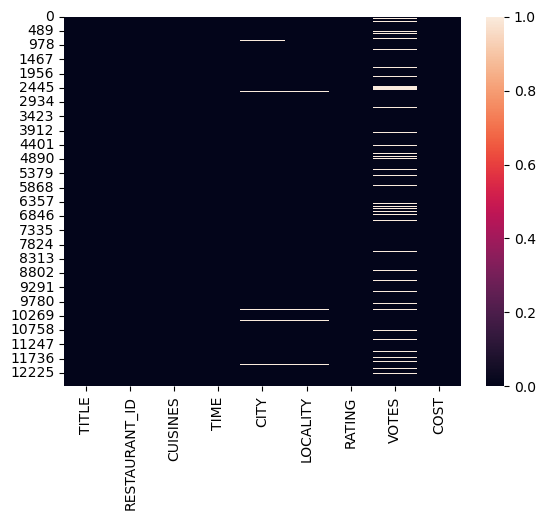

In [14]:
sns.heatmap(train.isnull())

<Axes: >

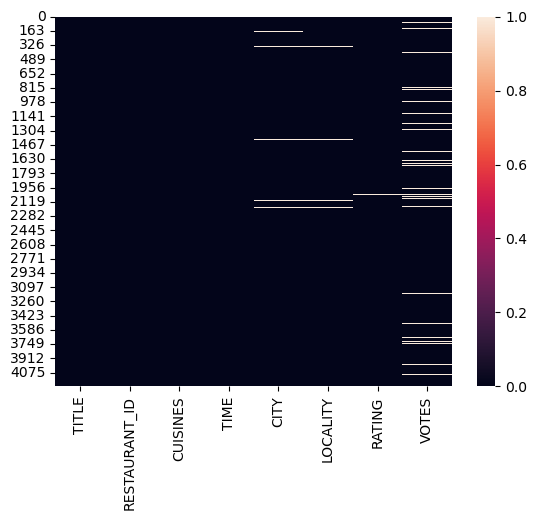

In [15]:
sns.heatmap(test.isnull())

There are presence of null values in both the datasets

# Handling the missing values

In [4]:
#filling null values for train data
train['CITY'].fillna("Not known",inplace=True) 
train['LOCALITY'].fillna("Not known",inplace=True)
train['VOTES'].fillna("00 votes",inplace=True)
train['RATING'].fillna(train['RATING'].mode()[0],inplace=True)

In [5]:
#filling null values for test data
test['CITY'].fillna("Not known",inplace=True) 
test['LOCALITY'].fillna("Not known",inplace=True)
test['VOTES'].fillna("00 votes",inplace=True)
test['RATING'].fillna(test['RATING'].mode()[0],inplace=True)

In [6]:
#rechecking for null values
train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [19]:
test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

All null values hasbeen removed in the both datasets.

In [7]:
#checking for values in train dataset
for i in train.columns:
    print(train[i].value_counts())
    print("*****************************************************************")

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BEVERAGE SHOP,FOOD COURT       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64
*****************************************************************
7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: RESTAURANT_ID, Length: 11892, dtype: int64
*****************************************************************
South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             .

From above we observe there is '-' and 'NEW' is present as values in 'Rating' column. 

In [21]:
#checking for values in test dataset
for i in test.columns:
    print(test[i].value_counts())
    print("*****************************************************************")

QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
CASUAL DINING,LOUNGE             1
CLUB,FINE DINING                 1
SWEET SHOP,DESSERT PARLOR        1
COCKTAIL BAR,CASUAL DINING       1
BHOJANALYA                       1
Name: TITLE, Length: 86, dtype: int64
*****************************************************************
15454    3
12799    3
7656     3
1619     3
11169    3
        ..
4318     1
636      1
7425     1
3631     1
2421     1
Name: RESTAURANT_ID, Length: 4127, dtype: int64
*****************************************************************
North Indian, Chinese                                 213
North Indian                                          190
South Indian                                          174
Fast Food                                              78
Chinese                                     

From above we observe there is '-' and 'NEW' is present as values in 'Rating' column.

In [22]:
#checking for unique values for each column in train dataset
train.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               360
LOCALITY          1417
RATING              32
VOTES             1848
COST                86
dtype: int64

In [23]:
#checking for unique values for each column in test dataset
test.nunique()

TITLE              86
RESTAURANT_ID    4127
CUISINES         1727
TIME             1183
CITY              152
LOCALITY          835
RATING             31
VOTES            1137
dtype: int64

In [24]:
train['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [25]:
test['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2'], dtype=object)

In [8]:
#replacing the hypen and 'new' with numeric values
train['RATING']=train['RATING'].replace({'-':3.0,'NEW':3.0})

In [9]:
test['RATING']=test['RATING'].replace({'-':3.0,'NEW':3.0})

In [10]:
train['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', 3.0,
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [11]:
test['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 3.0, '4.0', '3.4', '3.2', '4.1',
       '3.0', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5', '2.8',
       '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7', '2.3',
       '2.4', '2.2'], dtype=object)

In [12]:
#rating can be changed into float type
train['RATING']=train['RATING'].astype(float)

In [13]:
#rating can be changed into float type
test['RATING']=test['RATING'].astype(float)

In [17]:
train['TITLE'].isnull().sum()

0

In [18]:
train['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [14]:
#splitting title into 2 different columns
train['TITLE 1'] = train["TITLE"].str.split(",").str[0]
train['TITLE 2']=train["TITLE"].str.split(",").str[1]

#dropping 'TITLE' column
train.drop(['TITLE'],axis=1,inplace=True)
train.head()

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2
0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NaN
1,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR
2,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NaN
3,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NaN
4,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NaN


In [15]:
train['TITLE 2'].isnull().sum()

11208

In [16]:
train['TITLE 2'].fillna('Not known',inplace=True)

In [17]:
#splitting title into 2 different columns
test['TITLE 1'] = test["TITLE"].str.split(",").str[0]
test['TITLE 2']=test["TITLE"].str.split(",").str[1]

#dropping 'TITLE' column
test.drop(['TITLE'],axis=1,inplace=True)
test.head()

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2
0,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,CASUAL DINING,NaN
1,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,QUICK BITES,NaN
2,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,NaN
3,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,None,NaN
4,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,QUICK BITES,NaN


In [18]:
test['TITLE 2'].fillna('Not known',inplace=True)

In [19]:
train['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [20]:
#breaking the votes column for visualization
#splitting votes
train['VOTES']=train['VOTES'].str.split(' ').str[0]
train.head()

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2
0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,CASUAL DINING,Not known
1,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR
2,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,CASUAL DINING,Not known
3,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,QUICK BITES,Not known
4,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,Not known


In [21]:
test['VOTES']=test['VOTES'].str.split(' ').str[0]
test.head()

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2
0,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564,CASUAL DINING,Not known
1,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61,QUICK BITES,Not known
2,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350,CASUAL DINING,Not known
3,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445,None,Not known
4,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23,QUICK BITES,Not known


In [22]:
#changing data type for votes
train['VOTES']=train['VOTES'].astype(int)

In [23]:
#changing data type for votes
test['VOTES']=test['VOTES'].astype(int)

   # Exploratory Data Analysis

QUICK BITES       4337
CASUAL DINING     4122
None              1003
CAFÉ               749
DESSERT PARLOR     478
BAKERY             463
FINE DINING        350
BAR                254
BEVERAGE SHOP      215
LOUNGE             154
PUB                103
SWEET SHOP         102
FOOD COURT          93
KIOSK               56
MESS                53
DHABA               45
MICROBREWERY        44
FOOD TRUCK          30
CLUB                23
COCKTAIL BAR         6
PAAN SHOP            4
MEAT SHOP            3
CONFECTIONERY        3
Name: TITLE 1, dtype: int64


<Figure size 2000x500 with 0 Axes>

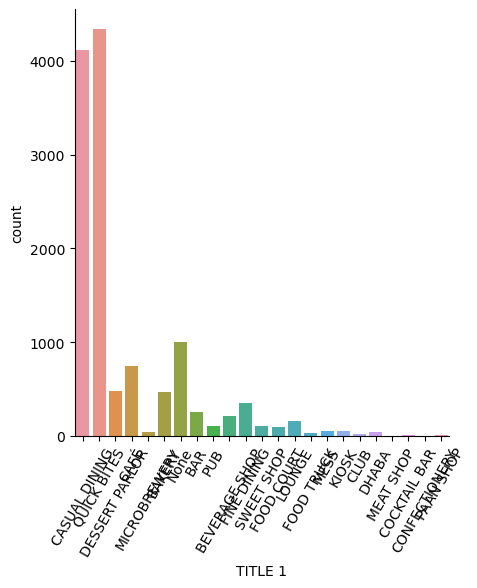

In [24]:
plt.figure(figsize=(20,5))
sns.catplot(x='TITLE 1',data=train, kind='count')
plt.xticks(rotation=60)
print(train['TITLE 1'].value_counts())

'Casual Dining' and 'Casual Bites' has highest count.

QUICK BITES       4337
CASUAL DINING     4122
None              1003
CAFÉ               749
DESSERT PARLOR     478
BAKERY             463
FINE DINING        350
BAR                254
BEVERAGE SHOP      215
LOUNGE             154
PUB                103
SWEET SHOP         102
FOOD COURT          93
KIOSK               56
MESS                53
DHABA               45
MICROBREWERY        44
FOOD TRUCK          30
CLUB                23
COCKTAIL BAR         6
PAAN SHOP            4
MEAT SHOP            3
CONFECTIONERY        3
Name: TITLE 1, dtype: int64


<Figure size 2000x500 with 0 Axes>

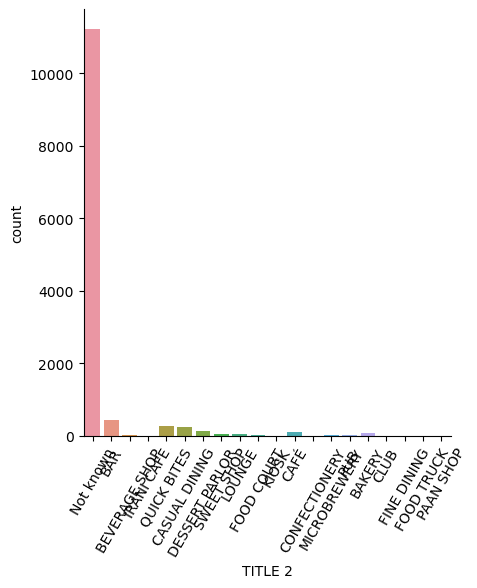

In [25]:
plt.figure(figsize=(20,5))
sns.catplot(x='TITLE 2',data=train, kind='count')
plt.xticks(rotation=60)
print(train['TITLE 1'].value_counts())

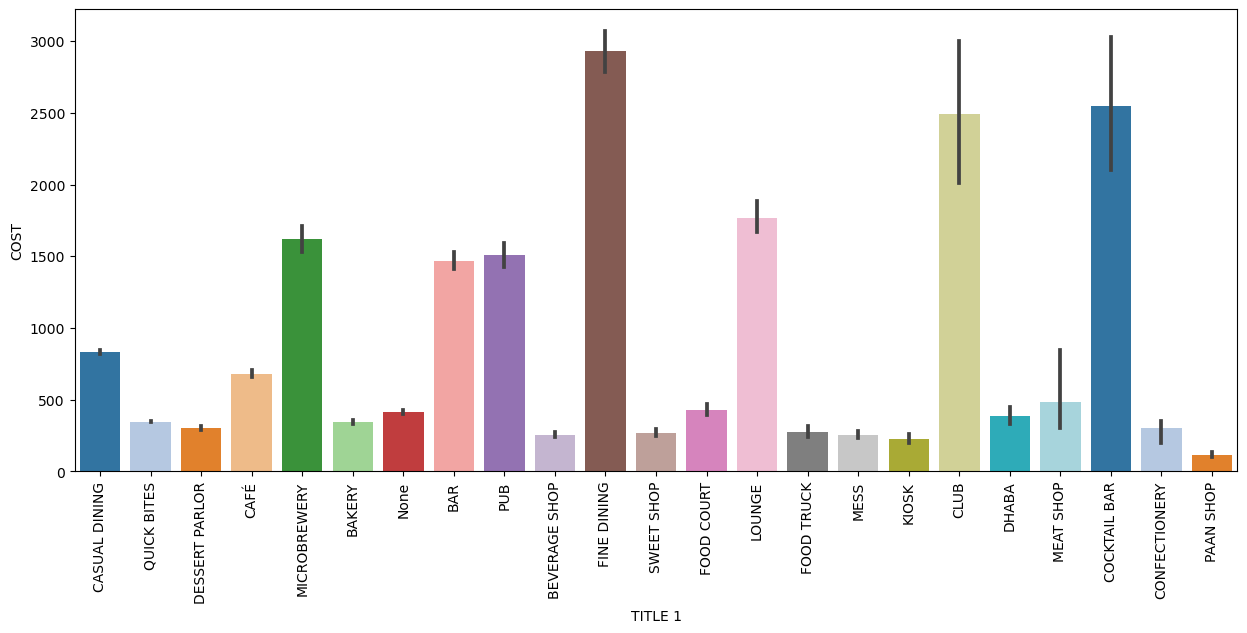

In [26]:
#relationship between cost and Title
plt.figure(figsize=(15,6))
sns.barplot(y="COST",x="TITLE 1",palette='tab20',data=train)
plt.xticks(rotation=90)
plt.show()

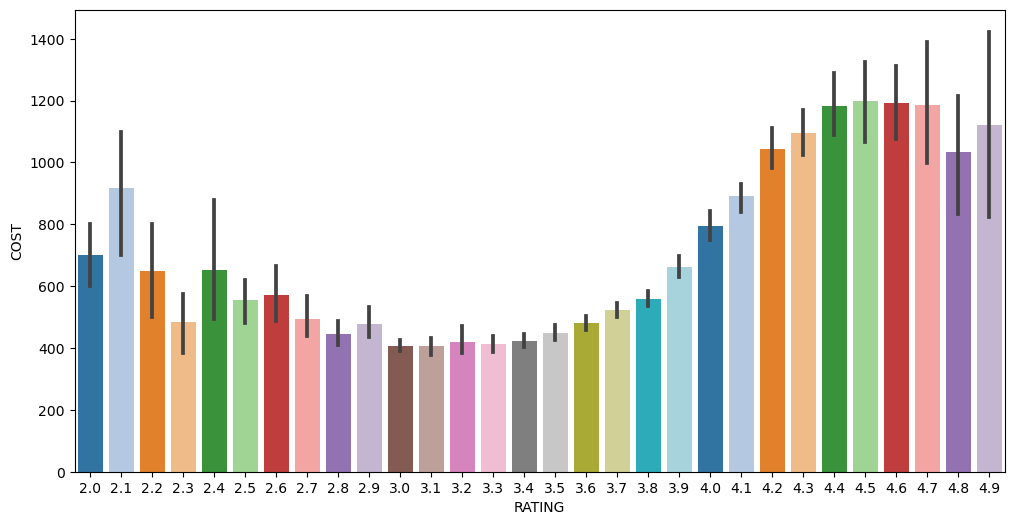

In [27]:
#relationship between RATINGS and COST
plt.figure(figsize=(12,6))
sns.barplot(y="COST",x="RATING",palette='tab20',data=train)
plt.show()

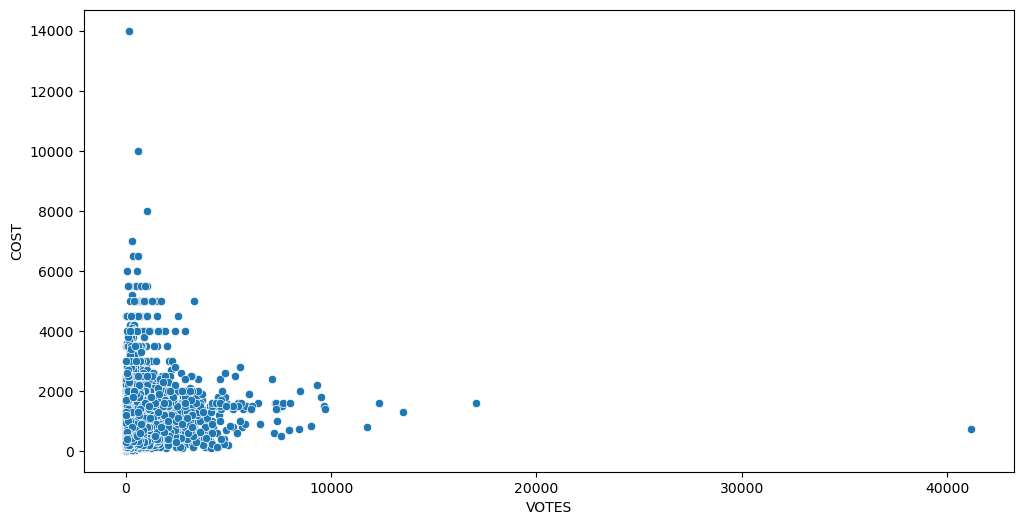

In [28]:
#relationship between RATINGS and VOTES
plt.figure(figsize=(12,6))
sns.scatterplot(y="COST",x="VOTES",palette='tab20',data=train)
plt.show()

From we can observe that:
1) the restaurants with good ratings were expensive
2) when the ratings were above 4 the cost was from 900 to 1400
3) some restaurants which were rated as 2.1 aslo had high cost
4) for the ratings from 2.8 to 3.4 the restaurant costs were less
5) high cost restaurants have 0 to 10000 votes.

In [29]:
#separating Numerical and Categorical columns

#checking for categorical columns

categorical_col=[]
for i in train.dtypes.index:
    if train.dtypes[i] =='object':
        categorical_col.append(i)
print("Categorical column :",categorical_col)
print("\n")

#checking for numerical values

numerical_col=[]
for i in train.dtypes.index:
    if train.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical column :',numerical_col)

Categorical column : ['CUISINES', 'TIME', 'CITY', 'LOCALITY', 'TITLE 1', 'TITLE 2']


Numerical column : ['RESTAURANT_ID', 'RATING', 'VOTES', 'COST']


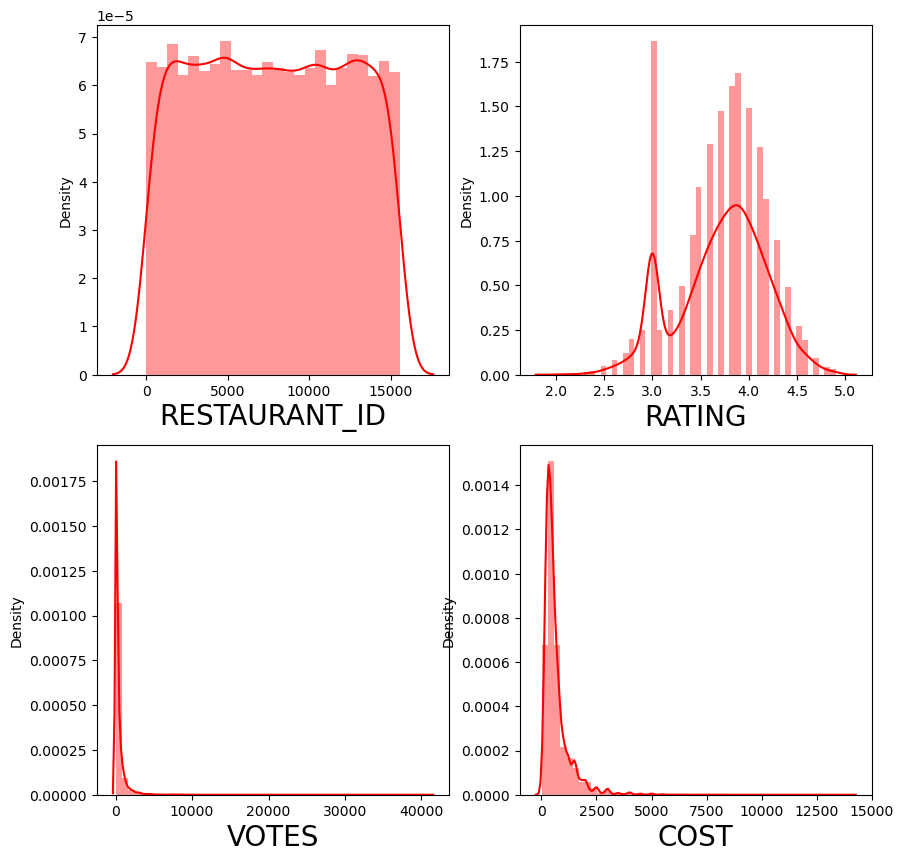

In [30]:
plt.figure(figsize=(10,10), facecolor='white')
plotnumber =1
for column in numerical_col:
    if plotnumber <=12:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(train[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data of 'VOTES' and 'COST' are right skewed.

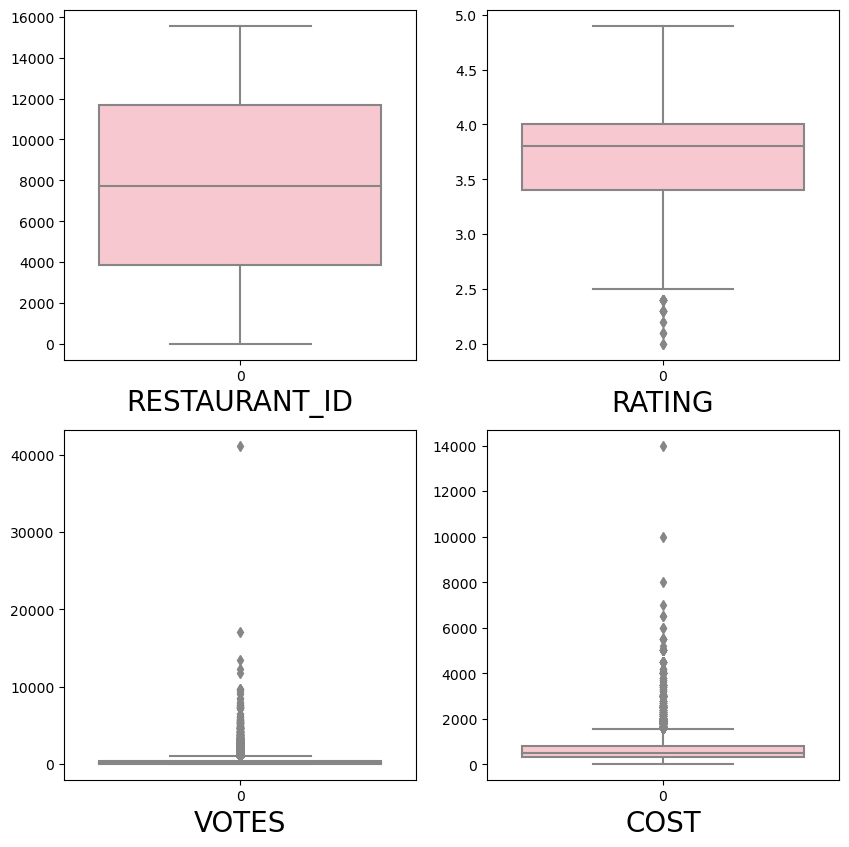

In [31]:
plt.figure(figsize=(10,10), facecolor='white')
plotnumber =1
for column in numerical_col:
    if plotnumber <=12:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(train[column], color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

There are presence of outliers in the dataset.

plt.figure(figsize=(15,30))
sns.catplot(x='COST',data=train,kind='count')
plt.xticks(rotation=90,weight='bold')
plt.show()

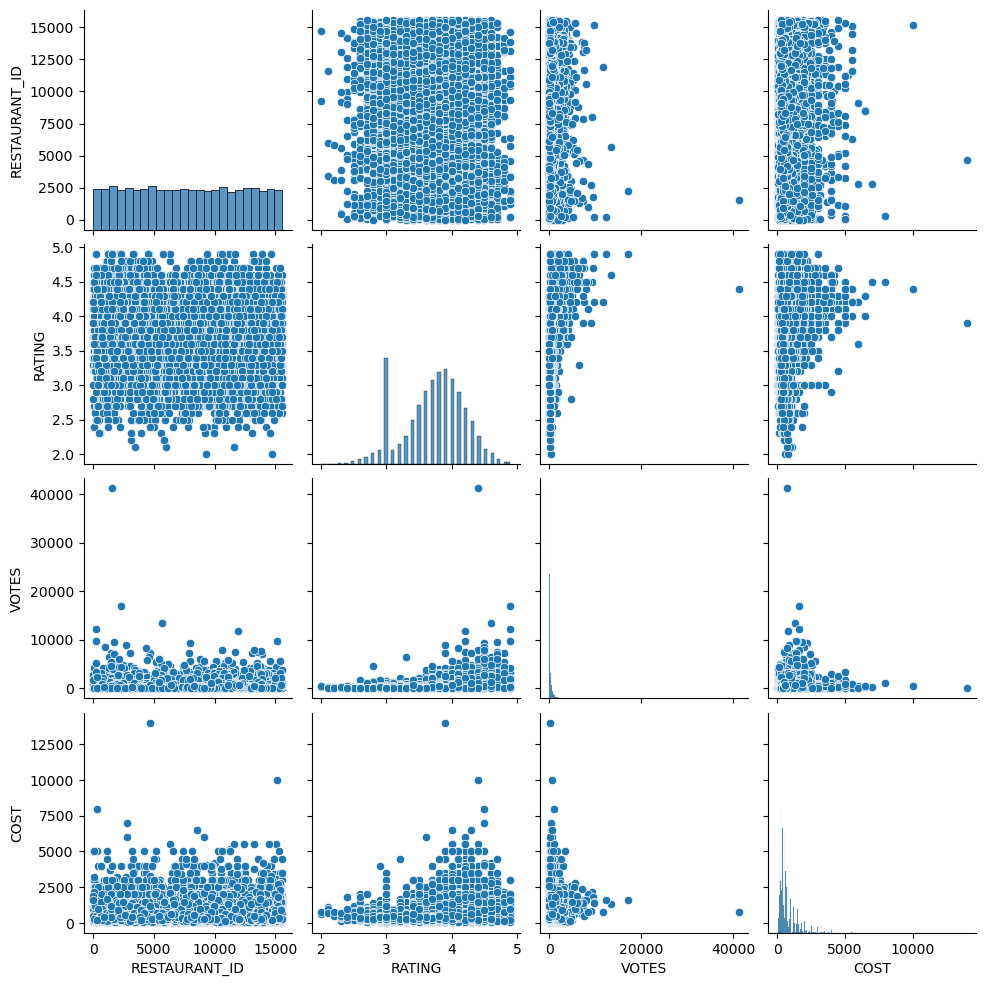

In [37]:
sns.pairplot(train)

# correlation

In [38]:
train.corr()

,RESTAURANT_ID,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.038031,0.000739,0.040710
RATING,0.038031,1.000000,0.373071,0.342828
VOTES,0.000739,0.373071,1.000000,0.257231
COST,0.040710,0.342828,0.257231,1.000000


In [39]:
test.corr()

,RESTAURANT_ID,RATING,VOTES
RESTAURANT_ID,1.000000,0.029633,0.001730
RATING,0.029633,1.000000,0.383861
VOTES,0.001730,0.383861,1.000000


<Axes: >

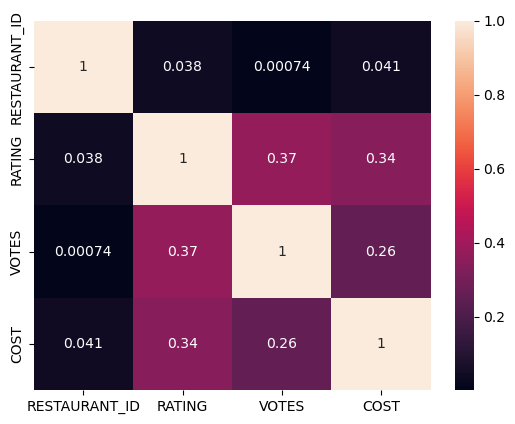

In [40]:
sns.heatmap(train.corr(),annot=True)

Cost have high correlation with Rating and least correlation with Restaurant id.

    As we can see 'Restaurant id' wont affect our target that is 'cost' so we will drop the 'Restaurant id' column.

In [32]:
train.drop(['RESTAURANT_ID'],axis=1,inplace=True)

<Axes: >

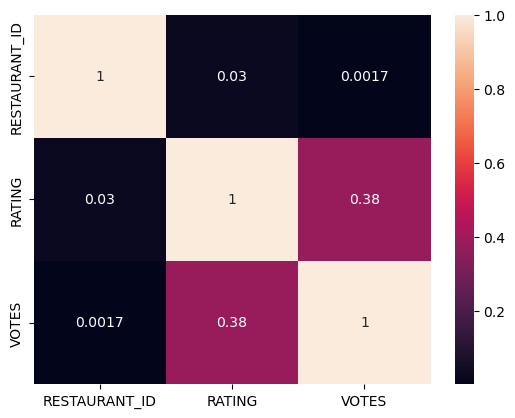

In [33]:
sns.heatmap(test.corr(),annot=True)

In [34]:
test.drop(['RESTAURANT_ID'],axis=1,inplace=True)

# Stastical summary


In [44]:
#for training dataset
train.describe()

,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000
mean,3.711072,376.231127,655.252246
std,0.462779,810.946942,627.003540
min,2.000000,0.000000,20.000000
25%,3.400000,39.250000,300.000000
50%,3.800000,132.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


In [45]:
#for testing dataset
test.describe()

,RATING,VOTES
count,4231.000000,4231.000000
mean,3.707658,388.935713
std,0.471473,800.940258
min,2.100000,0.000000
25%,3.400000,42.000000
50%,3.800000,134.000000
75%,4.000000,422.500000
max,4.900000,15205.000000


Both dataset:
1) Have same count indicates presence of unique values
2) the gap between 75th percetile and maximum value indicates the presence of outliers.

In [35]:
#splitting cuisines
train['CUISINES'].str.split(",",expand=True)
test['CUISINES'].str.split(",",expand=True)


,0,1,2,3,4,5,6,7
0,North Indian,Chinese,Mughlai,Kebab,None,None,None,None
1,South Indian,Fast Food,Pizza,North Indian,None,None,None,None
2,North Indian,Seafood,Biryani,Chinese,None,None,None,None
3,Biryani,None,None,None,None,None,None,None
4,South Indian,Kerala,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
4226,North Indian,Mughlai,Chinese,None,None,None,None,None
4227,Biryani,North Indian,Sandwich,Salad,Wraps,None,None,None
4228,Continental,North Indian,None,None,None,None,None,None
4229,Rolls,Beverages,None,None,None,None,None,None


In [36]:
#assinging names to the spiltted columns
split_cuisines = train["CUISINES"].str.split(",", expand = True)
train["CUISINE 1"] = split_cuisines[0]
train["CUISINE 2"] = split_cuisines[1]
train["CUISINE 3"] = split_cuisines[2]
train["CUISINE 4"] = split_cuisines[3]
train["CUISINE 5"] = split_cuisines[4]
train["CUISINE 6"] = split_cuisines[5]
train["CUISINE 7"] = split_cuisines[6]
train["CUISINE 8"] = split_cuisines[7]

In [37]:
#assinging names to the spiltted columns
split_cuisines = test["CUISINES"].str.split(",", expand = True)
test["CUISINE 1"] = split_cuisines[0]
test["CUISINE 2"] = split_cuisines[1]
test["CUISINE 3"] = split_cuisines[2]
test["CUISINE 4"] = split_cuisines[3]
test["CUISINE 5"] = split_cuisines[4]
test["CUISINE 6"] = split_cuisines[5]
test["CUISINE 7"] = split_cuisines[6]
test["CUISINE 8"] = split_cuisines[7]

In [38]:
train.drop(columns =["CUISINES"],axis=1, inplace = True)
train.head()

,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,CUISINE 4,CUISINE 5,CUISINE 6,CUISINE 7,CUISINE 8
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,CASUAL DINING,Not known,Malwani,Goan,North Indian,None,None,None,None,None
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,None,None,None,None
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,CASUAL DINING,Not known,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,QUICK BITES,Not known,Tibetan,Chinese,None,None,None,None,None,None
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,Not known,Desserts,None,None,None,None,None,None,None


In [39]:
test.drop(columns =["CUISINES"],axis=1, inplace = True)
test.head()

,TIME,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,CUISINE 4,CUISINE 5,CUISINE 6,CUISINE 7,CUISINE 8
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564,CASUAL DINING,Not known,North Indian,Chinese,Mughlai,Kebab,None,None,None,None
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61,QUICK BITES,Not known,South Indian,Fast Food,Pizza,North Indian,None,None,None,None
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350,CASUAL DINING,Not known,North Indian,Seafood,Biryani,Chinese,None,None,None,None
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445,None,Not known,Biryani,None,None,None,None,None,None,None
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23,QUICK BITES,Not known,South Indian,Kerala,None,None,None,None,None,None


In [40]:
train.isnull().sum()

TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
TITLE 1          0
TITLE 2          0
CUISINE 1        0
CUISINE 2     3062
CUISINE 3     6999
CUISINE 4     9995
CUISINE 5    11675
CUISINE 6    12276
CUISINE 7    12514
CUISINE 8    12613
dtype: int64

The shape of dataset is 12690 rows and 16 columns and most of entries of cuisine 4,5,6,7,8 are null we can drop this features.

In [41]:
train.drop(columns=['CUISINE 4','CUISINE 5','CUISINE 6','CUISINE 7','CUISINE 8'],axis=1,inplace=True)

In [42]:
test.isnull().sum()

TIME            0
CITY            0
LOCALITY        0
RATING          0
VOTES           0
TITLE 1         0
TITLE 2         0
CUISINE 1       0
CUISINE 2     985
CUISINE 3    2331
CUISINE 4    3314
CUISINE 5    3875
CUISINE 6    4094
CUISINE 7    4157
CUISINE 8    4200
dtype: int64

The shape of dataset is 4231 rows and 18 columns and most of entries of cuisine 4,5,6,7,8 are null we can drop this features.

In [43]:
test.drop(columns=['CUISINE 4','CUISINE 5','CUISINE 6','CUISINE 7','CUISINE 8'],axis=1,inplace=True)

In [44]:
#filling the remaining Null values

list1=['CUISINE 2','CUISINE 3']
for i in list1:
    train[i].fillna("Not known",inplace=True)

In [45]:
#filling the remaining Null values

list1=['CUISINE 2','CUISINE 3']
for i in list1:
    test[i].fillna("Not known",inplace=True)

In [46]:
train.isnull().sum()

TIME         0
CITY         0
LOCALITY     0
RATING       0
VOTES        0
COST         0
TITLE 1      0
TITLE 2      0
CUISINE 1    0
CUISINE 2    0
CUISINE 3    0
dtype: int64

In [47]:
test.isnull().sum()

TIME         0
CITY         0
LOCALITY     0
RATING       0
VOTES        0
TITLE 1      0
TITLE 2      0
CUISINE 1    0
CUISINE 2    0
CUISINE 3    0
dtype: int64

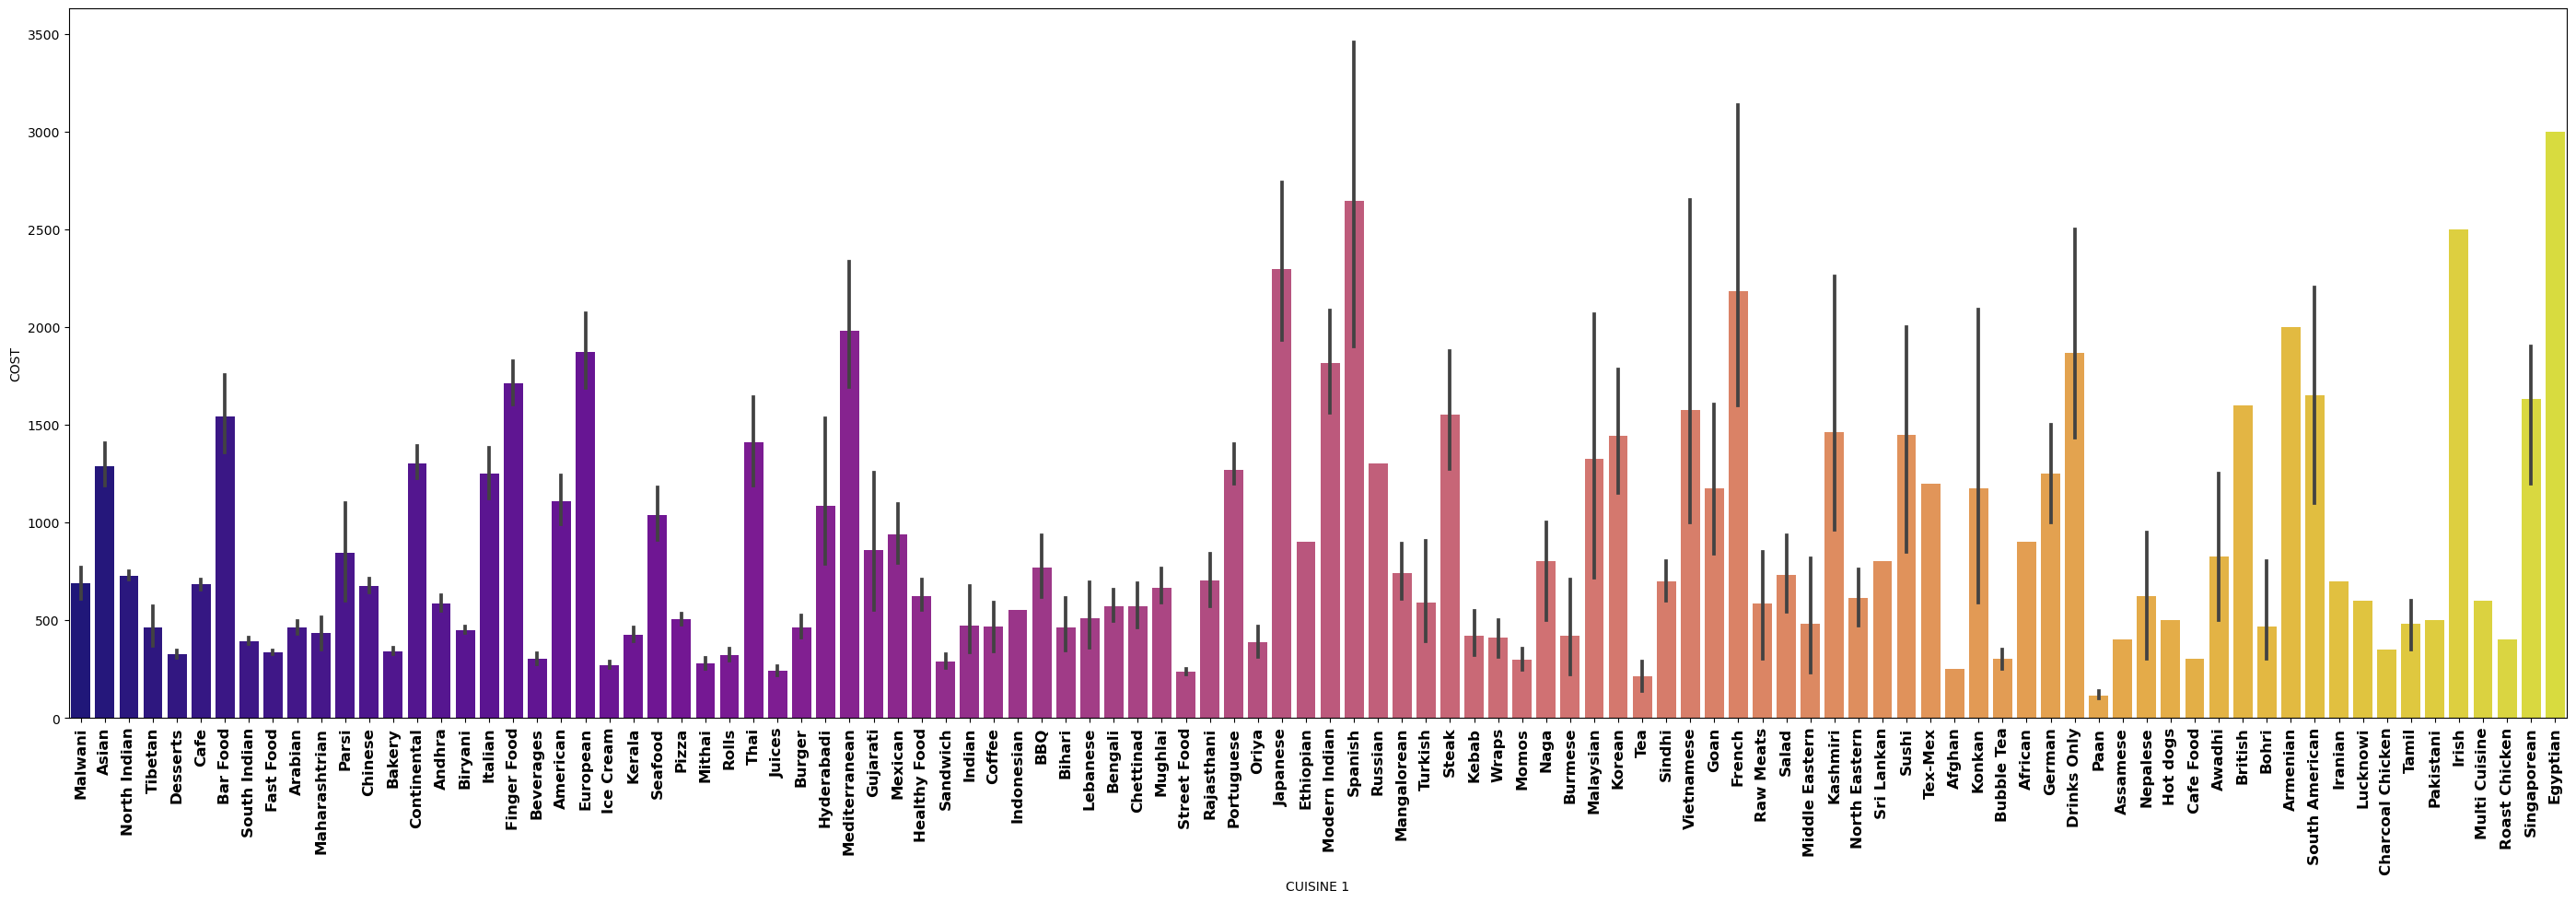

In [154]:
#relationship between cuisine 1 and COST
plt.figure(figsize=(35,10))
sns.barplot(y="COST",x="CUISINE 1",palette='plasma',data=train)
plt.xticks(rotation=90,fontsize=12,weight='bold')
plt.show()

Cuisines with maximum costs were:

1)Spanish

2)Japanese

3)French

4)Egtypian

TEA , PAAN , STREET FOOD , AFGHAN, and MOMOS had the least cost of all.

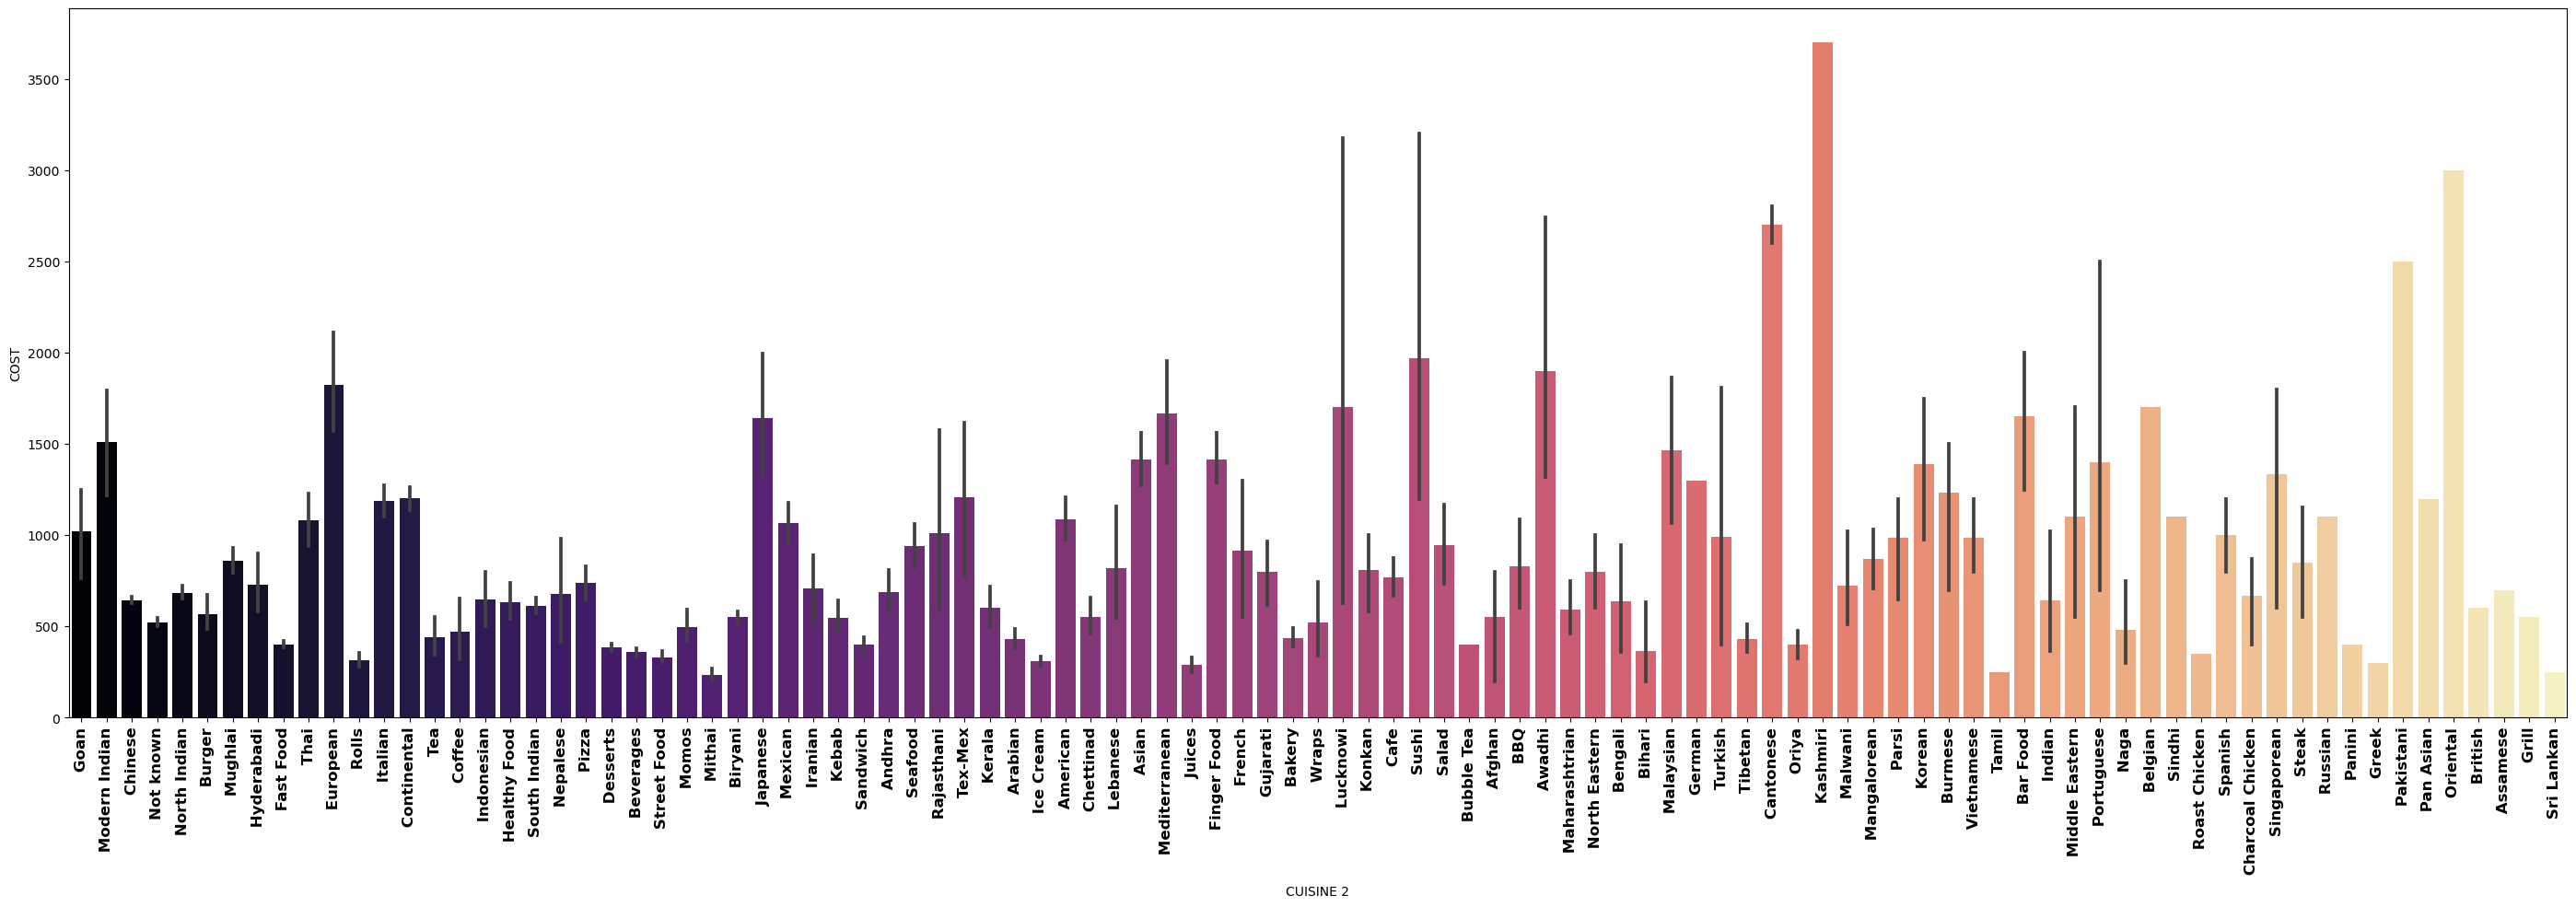

In [62]:
#relationship between cuisine 2 and COST
plt.figure(figsize=(35,10))
sns.barplot(y="COST",x="CUISINE 2",palette='magma',data=train)
plt.xticks(rotation=90,fontsize=12,weight='bold')
plt.show()

kashmiri has the maximum cost
Sushi and lucknowi had the high cost
Among all cuisine 2 Mithai had the least cost followed by juices and ice creams.

# Splitting the time column into shift one shift two and day

In [48]:
#splitting into shift one
import numpy as np
def extractShiftOne(i):

    timing = "Not available"
    if i is np.nan:
        pass
    else:
        if "," in i:
            timing= i.split(",")[0]
            
        else:
            timing = i.split("(")[0]
            
    return timing

In [49]:
train["Shift one"] = train["TIME"].apply(extractShiftOne)
test["Shift one"] = test["TIME"].apply(extractShiftOne)

In [50]:
#splitting into shift 2
import numpy as np
def extractShiftTwo(i):

    timing = "Not available"
    if i is np.nan:
        pass
    else:
        if "," in i:
            timing= i.split(",")[1].split("(")[0]
       
    return timing

In [51]:
train["Shift Two"] = train["TIME"].apply(extractShiftTwo)
test["Shift Two"] = test["TIME"].apply(extractShiftTwo)

# extracting days from time

In [52]:
def extractDays(i):

    days = "Not Known"
    if i is np.nan:
        pass
    else:
        if "(" in i:
            days= i.split("(")[-1][0:-1]
    return days

In [53]:
train['Days']=train["TIME"].apply(extractDays)
test['Days']=test["TIME"].apply(extractDays)

In [54]:
#dropping the time column
train.drop(['TIME'],axis=1,inplace=True)
test.drop(['TIME'],axis=1,inplace=True)

In [55]:
train.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,Thane,Dombivali East,3.6,49,1200,CASUAL DINING,Not known,Malwani,Goan,North Indian,11am – 4pm,7:30pm – 11:30pm,Mon-Sun
1,Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,6pm – 11pm,Not available,Mon-Sun
2,Chennai,Saligramam,3.8,221,800,CASUAL DINING,Not known,North Indian,Chinese,Biryani,11am – 3:30pm,7pm – 11pm,Mon-Sun
3,Mumbai,Bandra West,4.1,24,800,QUICK BITES,Not known,Tibetan,Chinese,Not known,11:30am – 1am,Not available,Mon-Sun
4,Mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,Not known,Desserts,Not known,Not known,11am – 1am,Not available,Mon-Sun


In [56]:
test.head()

,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,Noida,Sector 18,4.3,564,CASUAL DINING,Not known,North Indian,Chinese,Mughlai,12noon – 12midnight,Not available,Mon-Sun
1,Mumbai,Grant Road,4.2,61,QUICK BITES,Not known,South Indian,Fast Food,Pizza,7am – 12:30AM,Not available,Mon-Sun
2,Mumbai,Marine Lines,3.8,350,CASUAL DINING,Not known,North Indian,Seafood,Biryani,11am – 11:30pm,Not available,Mon-Sun
3,Faridabad,NIT,3.8,1445,None,Not known,Biryani,Not known,Not known,9am – 10pm (Mon,Wed,"Mon, Wed, Thu, Fri, Sat, Sun), 10:39am.."
4,Kochi,Kaloor,3.6,23,QUICK BITES,Not known,South Indian,Kerala,Not known,11am – 10pm,Not available,Mon-Sun


# Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
list=['CITY','LOCALITY','TITLE 1','TITLE 2','CUISINE 1', 'CUISINE 2', 'CUISINE 3','Shift one','Shift Two','Days']
Le=LabelEncoder()
for i in list:
    train[i]=Le.fit_transform(train[i])

In [59]:
train.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,321,285,3.6,49,1200,4,15,59,32,66,343,170,356
1,67,1047,4.2,30,1500,4,1,6,60,41,943,579,356
2,67,1102,3.8,221,800,4,15,72,23,12,327,196,356
3,222,136,4.1,24,800,21,15,100,23,93,176,579,356
4,222,620,3.8,165,300,8,15,28,98,93,314,579,356


In [60]:
list=['CITY','LOCALITY','TITLE 1','TITLE 2','CUISINE 1', 'CUISINE 2', 'CUISINE 3','Shift one','Shift Two','Days']

for i in list:
    test[i]=Le.fit_transform(test[i])

In [61]:
test.head()

,CITY,LOCALITY,RATING,VOTES,TITLE 1,TITLE 2,CUISINE 1,CUISINE 2,CUISINE 3,Shift one,Shift Two,Days
0,110,663,4.3,564,5,13,60,19,56,297,315,137
1,96,221,4.2,61,22,13,73,24,61,592,315,137
2,96,411,3.8,350,5,13,60,69,13,144,315,137
3,41,456,3.8,1445,19,13,12,81,80,720,129,93
4,78,300,3.6,23,22,13,73,42,80,139,315,137


# Spliting Data


In [62]:
x=train.drop(['COST'],axis=1)
y=train['COST']

In [63]:
x.shape,y.shape

((12690, 12), (12690,))

# Model Building

In [64]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection import cross_val_score


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=40)

In [66]:
model= [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(), SVR(),GradientBoostingRegressor(),AdaBoostRegressor()]

# Finding best Random State

In [67]:
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3, random_state=i)
    lr=LinearRegression()
    maxScore = 0
    maxRs = 0
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)
    if score>maxScore:
        maxScore = score
        maxRs=i
print("Best Accuracy is:", maxScore, "on Random State:", maxRs)  

Best Accuracy is: 0.20555095805083834 on Random State: 49


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=49)

In [69]:
x_train.shape,y_train.shape

((8502, 12), (8502,))

In [70]:
x_test.shape,y_test.shape

((4188, 12), (4188,))

# Different model

In [71]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Evaluation metrics of',m,':')
    print(f" R2 score is: {r2_score(y_test,pred)*100}")
    print ('\n','mean_absolute_error:','\n',mean_absolute_error(y_test,pred))
    print ('\n','mean_squared_error:','\n',mean_squared_error(y_test,pred))
    print('_________________________________________________________________________________')

Evaluation metrics of LinearRegression() :
 R2 score is: 20.622258378642776

 mean_absolute_error: 
 316.0186372594424

 mean_squared_error: 
 320304.6095302286
_________________________________________________________________________________
Evaluation metrics of RandomForestRegressor() :
 R2 score is: 66.90465505158909

 mean_absolute_error: 
 194.92682028016554

 mean_squared_error: 
 133546.14687244772
_________________________________________________________________________________
Evaluation metrics of KNeighborsRegressor() :
 R2 score is: 7.590579727960067

 mean_absolute_error: 
 354.5696275071633

 mean_squared_error: 
 372889.9647755492
_________________________________________________________________________________
Evaluation metrics of DecisionTreeRegressor() :
 R2 score is: 43.50017406851373

 mean_absolute_error: 
 265.25334288443173

 mean_squared_error: 
 227987.77483285576
_________________________________________________________________________________
Evaluation met

Here RandomForestRegressor is giving the best accuracy score that is 67.03

# Cross validation score

In [180]:
rf=RandomForestRegressor()
score=cross_val_score(rf,x,y,cv=5)
print('\n')
print('Cross Validation Score', rf, ':')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Standard deviation :",score.std())




Cross Validation Score RandomForestRegressor() :
Score : [0.65924001 0.75189009 0.68764226 0.71772939 0.75677296]
Mean Score : 0.7146549411903219
Standard deviation : 0.03733720895183368


# HyperParameter Tuning

model has been built after hypertunning it the code is not mentioned as it took large time to execute

In [78]:
Final_model = RandomForestRegressor(min_samples_split= 10,min_samples_leaf=1,max_features='sqrt',max_depth=30,
                       n_estimators=500)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
r2_score=r2_score(y_test,pred)
print(r2_score*100)

62.83706768088378


In [81]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute Error:  205.79796895461772
Mean Squared Error:  149959.65219386027
Root Mean Squared Error:  387.2462423237445


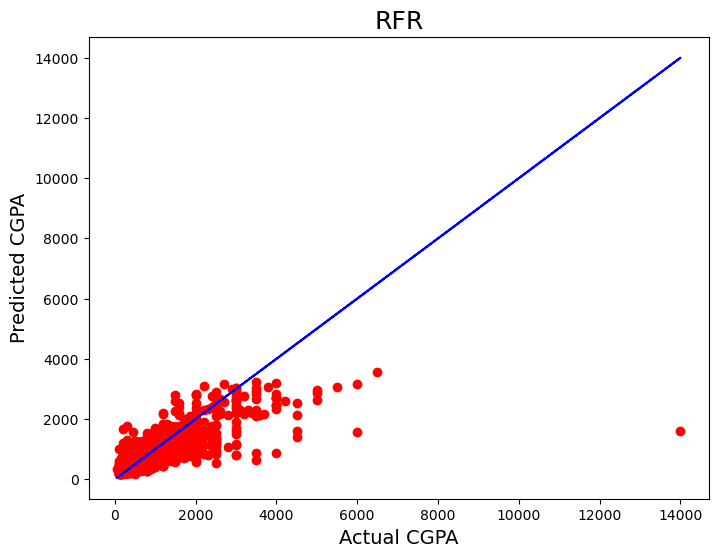

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color ='r')
plt.plot(y_test,y_test,color ='b')
plt.xlabel('Actual CGPA',fontsize = 14)
plt.ylabel('Predicted CGPA',fontsize =14)
plt.title('RFR',fontsize = 18)
plt.show()

# Saving the best model

In [87]:
import pickle
filename="Restaurants-cost.pkl"
pickle.dump(Final_model,open(filename,'wb'))

In [88]:
actual=np.array(y_test)
predicted=np.array(Final_model.predict(x_test))


In [89]:
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,500,380.442164
1,1500,883.993877
2,600,359.463079
3,1600,1165.298042
4,300,329.797064
...,...,...
4183,100,280.701664
4184,700,626.638483
4185,250,373.142352
4186,400,448.004760


In [90]:
#saving the predicted file as csv
df_com.to_csv("predictions of restaurant cost.csv")

# using the saved model to make predictions for given test dataset

In [91]:
saved_model=pickle.load(open("Restaurants-cost.pkl",'rb'))

In [92]:
saved_model

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=500)

In [94]:
predictions=saved_model.predict(test)
predictions

array([1132.38174043,  700.95032945, 1010.0489722 , ...,  506.77309532,
        554.81468418,  557.05551538])

In [95]:
prediction=pd.DataFrame(predictions)
prediction

,0
0,1132.381740
1,700.950329
2,1010.048972
3,1080.041906
4,543.295816
...,...
4226,993.694712
4227,1061.853199
4228,506.773095
4229,554.814684


# THANK YOU